### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:


import pandas as pd

df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

agrupado = (
    df.groupby(["Lugar de Compra", "Categoría del Producto"])["Producto"]
    .count()
    .reset_index()
)

agrupado.rename(columns={"Producto": "Cantidad de productos vendidos"}, inplace=True)

print("Productos vendidos por categoría en cada tienda:\n")
display(agrupado)





Productos vendidos por categoría en cada tienda:



,Lugar de Compra,Categoría del Producto,Cantidad de productos vendidos
0,Armenia,Artículos para el hogar,3
1,Armenia,Deportes y diversión,1
2,Armenia,Electrodomésticos,2
3,Armenia,Electrónicos,7
4,Armenia,Instrumentos musicales,1
...,...,...,...
142,Villavicencio,Electrónicos,4
143,Villavicencio,Instrumentos musicales,3
144,Villavicencio,Juguetes,3
145,Villavicencio,Libros,1


from matplotlib import pyplot as plt
agrupado['Cantidad de productos vendidos'].plot(kind='hist', bins=20, title='Cantidad de productos vendidos')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
agrupado.groupby('Categoría del Producto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
agrupado['Cantidad de productos vendidos'].plot(kind='line', figsize=(8, 4), title='Cantidad de productos vendidos')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(agrupado['Categoría del Producto'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(agrupado, x='Cantidad de productos vendidos', y='Categoría del Producto', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

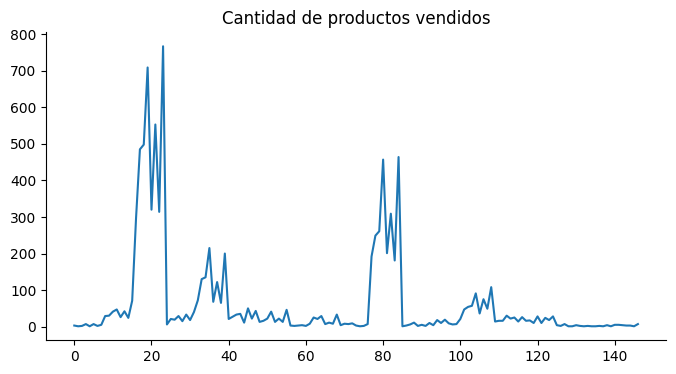

In [ ]:
from matplotlib import pyplot as plt
agrupado['Cantidad de productos vendidos'].plot(kind='line', figsize=(8, 4), title='Cantidad de productos vendidos')
plt.gca().spines[['top', 'right']].set_visible(False)

# 2. Ventas por categoría

In [ ]:
df["Lugar de Compra"].value_counts()

agrupado = (
    df.groupby(["Lugar de Compra", "Categoría del Producto"])["Producto"]
    .count()
    .reset_index()
)

top_categorias = agrupado.loc[
    agrupado.groupby("Lugar de Compra")["Producto"].idxmax()
]

print("Lugar de Compra:\n")
display(agrupado)





Lugar de Compra:



,Lugar de Compra,Categoría del Producto,Producto
0,Armenia,Artículos para el hogar,3
1,Armenia,Deportes y diversión,1
2,Armenia,Electrodomésticos,2
3,Armenia,Electrónicos,7
4,Armenia,Instrumentos musicales,1
...,...,...,...
142,Villavicencio,Electrónicos,4
143,Villavicencio,Instrumentos musicales,3
144,Villavicencio,Juguetes,3
145,Villavicencio,Libros,1


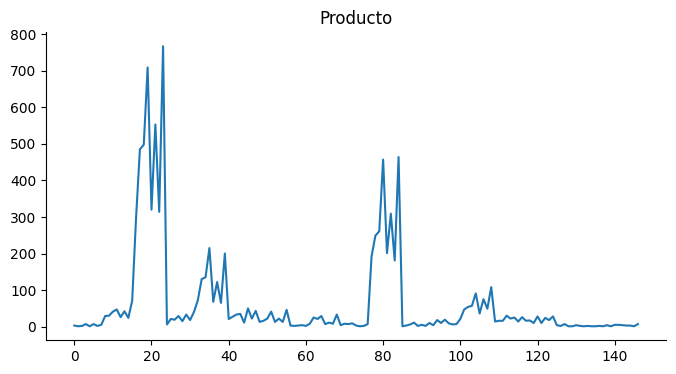

In [ ]:
from matplotlib import pyplot as plt
agrupado['Producto'].plot(kind='line', figsize=(8, 4), title='Producto')
plt.gca().spines[['top', 'right']].set_visible(False)

# 3. Calificación promedio de la tienda


In [ ]:
import pandas as pd


df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
promedio_calificacion = df.groupby("Lugar de Compra")["Calificación"].mean().reset_index()

suma_de_Calificación = df["Calificación"].sum()
cantidad_de_Calificación = df["Calificación"].count()
valoracion_media = suma_de_Calificación / cantidad_de_Calificación

print("Valoración media general:", valoracion_media)

promedio_por_tienda = (
    df.groupby("Lugar de Compra")["Calificación"]
    .mean()
    .reset_index()
)

print("Valoración media general:\n")
display(agrupado)





Valoración media general: 4.014520402755696
Valoración media general:



,Lugar de Compra,Categoría del Producto,Producto
0,Armenia,Artículos para el hogar,3
1,Armenia,Deportes y diversión,1
2,Armenia,Electrodomésticos,2
3,Armenia,Electrónicos,7
4,Armenia,Instrumentos musicales,1
...,...,...,...
142,Villavicencio,Electrónicos,4
143,Villavicencio,Instrumentos musicales,3
144,Villavicencio,Juguetes,3
145,Villavicencio,Libros,1


from matplotlib import pyplot as plt
agrupado['Producto'].plot(kind='hist', bins=20, title='Producto')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
agrupado.groupby('Categoría del Producto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
agrupado['Producto'].plot(kind='line', figsize=(8, 4), title='Producto')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(agrupado['Categoría del Producto'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(agrupado, x='Producto', y='Categoría del Producto', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

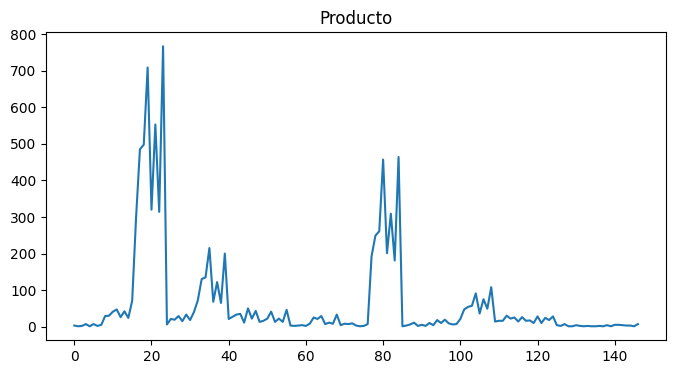

In [ ]:
from matplotlib import pyplot as plt
agrupado['Producto'].plot(kind='line', figsize=(8, 4), title='Producto')
plt.gca().spines[['top', 'right']].set_visible(True)

# 4. Productos más y menos vendidos

In [ ]:
import pandas as pd


df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

ventas_por_producto = (
    df.groupby(["Lugar de Compra", "Producto"])
    .size()
    .reset_index(name="Cantidad de Ventas")
)

mas_vendidos = ventas_por_producto.loc[
    ventas_por_producto.groupby("Lugar de Compra")["Cantidad de Ventas"].idxmax()
]


menos_vendidos = ventas_por_producto.loc[
    ventas_por_producto.groupby("Lugar de Compra")["Cantidad de Ventas"].idxmin()
]

print("Productos mas vendidos:\n")
display(agrupado)

print("Productos menos vendidos:\n")
display(agrupado)



Productos mas vendidos:



,Lugar de Compra,Categoría del Producto,Cantidad de productos vendidos
0,Armenia,Artículos para el hogar,3
1,Armenia,Deportes y diversión,1
2,Armenia,Electrodomésticos,2
3,Armenia,Electrónicos,7
4,Armenia,Instrumentos musicales,1
...,...,...,...
142,Villavicencio,Electrónicos,4
143,Villavicencio,Instrumentos musicales,3
144,Villavicencio,Juguetes,3
145,Villavicencio,Libros,1


Productos menos vendidos:



,Lugar de Compra,Categoría del Producto,Cantidad de productos vendidos
0,Armenia,Artículos para el hogar,3
1,Armenia,Deportes y diversión,1
2,Armenia,Electrodomésticos,2
3,Armenia,Electrónicos,7
4,Armenia,Instrumentos musicales,1
...,...,...,...
142,Villavicencio,Electrónicos,4
143,Villavicencio,Instrumentos musicales,3
144,Villavicencio,Juguetes,3
145,Villavicencio,Libros,1


from matplotlib import pyplot as plt
agrupado['Cantidad de productos vendidos'].plot(kind='hist', bins=20, title='Cantidad de productos vendidos')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
agrupado.groupby('Categoría del Producto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
agrupado['Cantidad de productos vendidos'].plot(kind='line', figsize=(8, 4), title='Cantidad de productos vendidos')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(agrupado['Categoría del Producto'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(agrupado, x='Cantidad de productos vendidos', y='Categoría del Producto', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
agrupado['Cantidad de productos vendidos'].plot(kind='hist', bins=20, title='Cantidad de productos vendidos')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
agrupado.groupby('Categoría del Producto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
agrupado['Cantidad de productos vendidos'].plot(kind='line', figsize=(8, 4), title='Cantidad de productos vendidos')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(agrupado['Categoría del Producto'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(agrupado, x='Cantidad de productos vendidos', y='Categoría del Producto', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

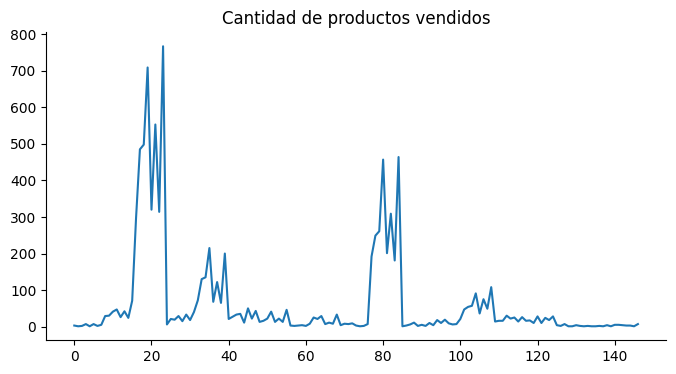

In [ ]:
from matplotlib import pyplot as plt
agrupado['Cantidad de productos vendidos'].plot(kind='line', figsize=(8, 4), title='Cantidad de productos vendidos')
plt.gca().spines[['top', 'right']].set_visible(False)

# 5. Envío promedio por tienda

In [ ]:
import pandas as pd


df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


costo_envio_promedio = (
    df.groupby("Lugar de Compra")["Costo de envío"]
    .mean()
    .reset_index()
)

print("Envio promedio por tienda:\n")
display(agrupado)

Envio promedio por tienda:



,Lugar de Compra,Categoría del Producto,Cantidad de productos vendidos
0,Armenia,Artículos para el hogar,3
1,Armenia,Deportes y diversión,1
2,Armenia,Electrodomésticos,2
3,Armenia,Electrónicos,7
4,Armenia,Instrumentos musicales,1
...,...,...,...
142,Villavicencio,Electrónicos,4
143,Villavicencio,Instrumentos musicales,3
144,Villavicencio,Juguetes,3
145,Villavicencio,Libros,1


from matplotlib import pyplot as plt
agrupado['Cantidad de productos vendidos'].plot(kind='hist', bins=20, title='Cantidad de productos vendidos')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
agrupado.groupby('Categoría del Producto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
agrupado['Cantidad de productos vendidos'].plot(kind='line', figsize=(8, 4), title='Cantidad de productos vendidos')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(agrupado['Categoría del Producto'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(agrupado, x='Cantidad de productos vendidos', y='Categoría del Producto', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

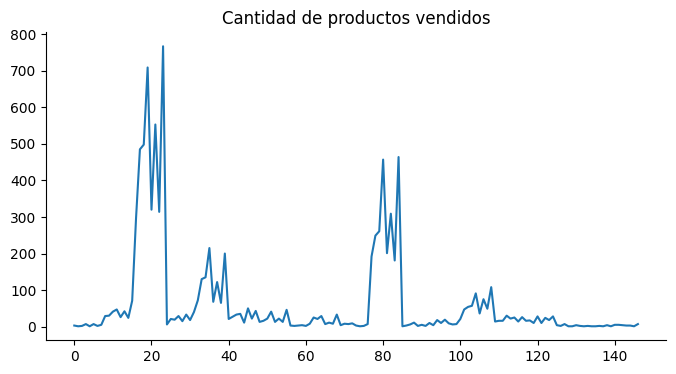

In [ ]:
from matplotlib import pyplot as plt
agrupado['Cantidad de productos vendidos'].plot(kind='line', figsize=(8, 4), title='Cantidad de productos vendidos')
plt.gca().spines[['top', 'right']].set_visible(False)

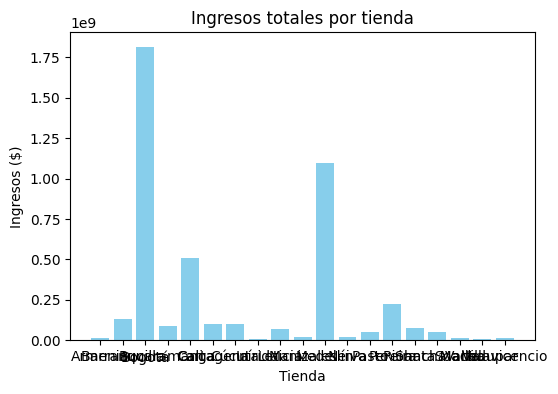

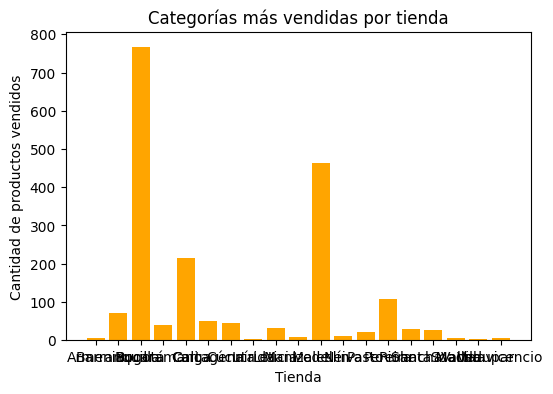

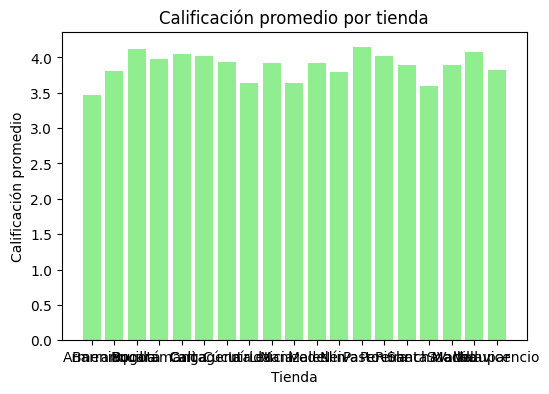

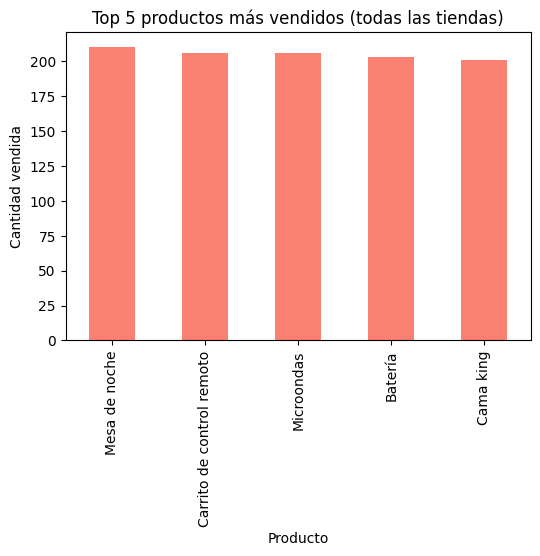

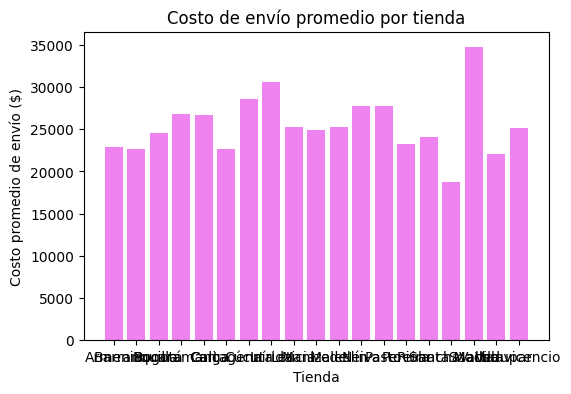

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


# 1️⃣ INGRESOS TOTALES POR TIENDA

ingresos_por_tienda = df.groupby("Lugar de Compra")["Precio"].sum().reset_index()

plt.figure(figsize=(6,4))
plt.bar(ingresos_por_tienda["Lugar de Compra"], ingresos_por_tienda["Precio"], color='skyblue')
plt.title("Ingresos totales por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos ($)")
plt.show()


# 2️⃣ CATEGORÍAS MÁS VENDIDAS POR TIENDA

categorias = df.groupby(["Lugar de Compra", "Categoría del Producto"])["Producto"].count().reset_index()
top_categorias = categorias.loc[categorias.groupby("Lugar de Compra")["Producto"].idxmax()]

plt.figure(figsize=(6,4))
plt.bar(top_categorias["Lugar de Compra"], top_categorias["Producto"], color='orange')
plt.title("Categorías más vendidas por tienda")
plt.xlabel("Tienda")
plt.ylabel("Cantidad de productos vendidos")
plt.show()


# 3️⃣ CALIFICACIÓN PROMEDIO POR TIENDA

promedio_calificacion = df.groupby("Lugar de Compra")["Calificación"].mean().reset_index()

plt.figure(figsize=(6,4))
plt.bar(promedio_calificacion["Lugar de Compra"], promedio_calificacion["Calificación"], color='lightgreen')
plt.title("Calificación promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")
plt.show()


# 4️⃣ PRODUCTOS MÁS VENDIDOS (TOP 5 GLOBAL)

productos_top = df["Producto"].value_counts().head(5)

plt.figure(figsize=(6,4))
productos_top.plot(kind='bar', color='salmon')
plt.title("Top 5 productos más vendidos (todas las tiendas)")
plt.xlabel("Producto")
plt.ylabel("Cantidad vendida")
plt.show()


# 5️⃣ COSTO DE ENVÍO PROMEDIO POR TIENDA

envio_promedio = df.groupby("Lugar de Compra")["Costo de envío"].mean().reset_index()

plt.figure(figsize=(6,4))
plt.bar(envio_promedio["Lugar de Compra"], envio_promedio["Costo de envío"], color='violet')
plt.title("Costo de envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo promedio de envío ($)")
plt.show()
